In [18]:
import pandas as pd
import numpy as np
import re
import string 
import spacy 
import nltk 

from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from unicodedata import normalize

from nltk import tokenize
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")


In [2]:
az = pd.read_csv("E:/ExcelR/Projects/Data Science/1.Project -174 Group - 5 (07-12-22)  (Neha Gupta-Amazon Reviews NLP)/Product_details.csv")

In [3]:
az.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


In [4]:
az.shape

(6364, 4)

In [5]:
az.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


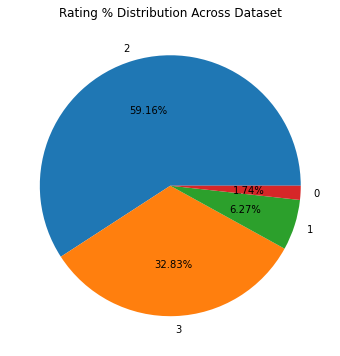

In [6]:
plt.figure(figsize=(20,6))
plt.pie(az["Sentiment"].value_counts(),labels=["2","3","1","0"], autopct='%1.2f%%')
plt.title("Rating % Distribution Across Dataset")
plt.show();

In [7]:
ct=pd.crosstab(az["Sentiment"],az["Product_Type"],margins=True)
ct

Product_Type,0,1,2,3,4,5,6,7,8,9,All
Sentiment,,,,,,,,,,,
0,0,0,2,1,0,0,2,0,1,105,111
1,4,5,69,49,0,36,84,43,65,44,399
2,1,1,15,10,0,6,16,8,6,3702,3765
3,47,53,379,240,19,171,563,276,122,219,2089
All,52,59,465,300,19,213,665,327,194,4070,6364


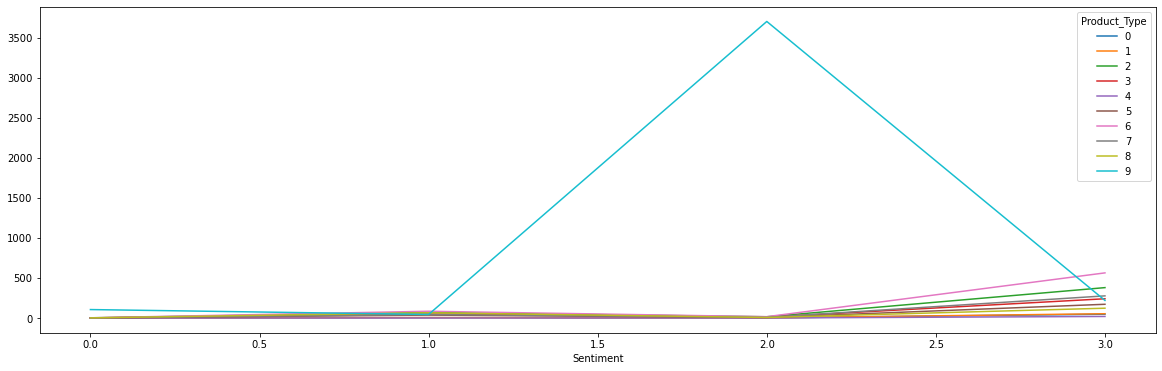

In [8]:
fig, ax = plt.subplots(figsize=(20,6))
ct.iloc[:-1,:-1].plot(kind="line",ax=ax);

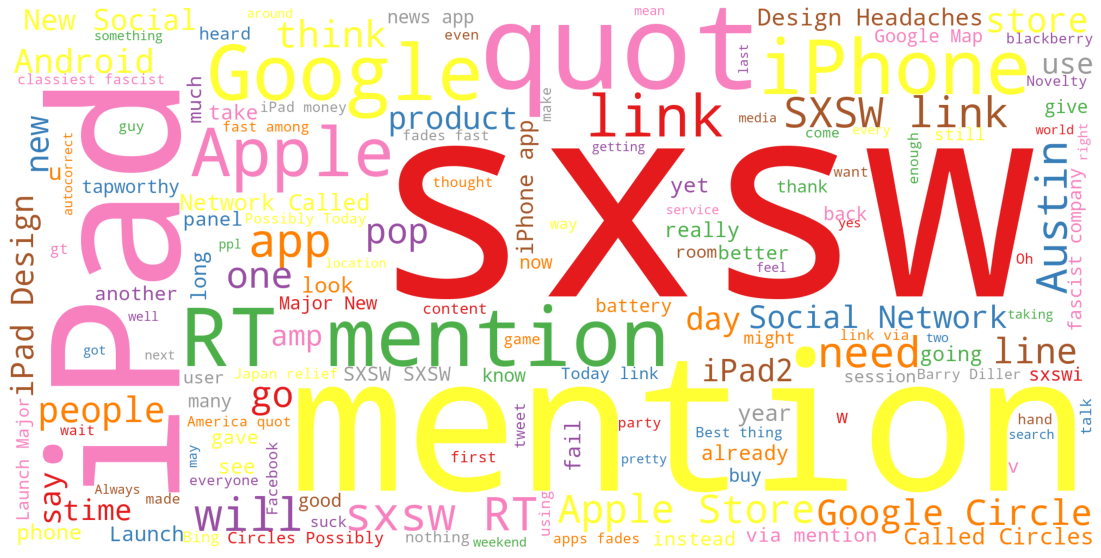

In [9]:
# Negative Word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)  
    plt.axis("off");
    
# Generate & plot wordcloud
wordcloud=WordCloud(width=2000,height=1000,background_color="white",max_words=150,
                    colormap="Set1").generate(" ".join(az[az["Sentiment"]<=1].Product_Description))
plot_cloud(wordcloud);

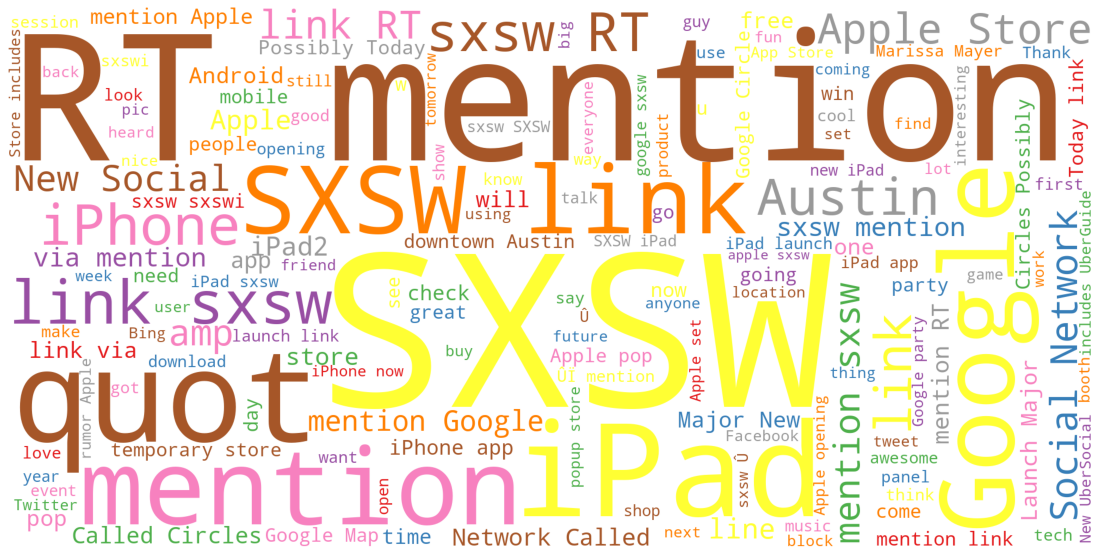

In [10]:
# Positive Word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)  
    plt.axis("off");
    
# Generate & plot wordcloud
wordcloud=WordCloud(width=2000,height=1000,background_color="white",max_words=150,
                    colormap="Set1").generate(" ".join(az[az["Sentiment"]>=2].Product_Description))
plot_cloud(wordcloud);

In [11]:
amazon = pd.DataFrame(az["Product_Description"])
amazon.head()

,Product_Description
0,The Web DesignerÛªs Guide to iOS (and Android...
1,RT @mention Line for iPad 2 is longer today th...
2,Crazy that Apple is opening a temporary store ...
3,The lesson from Google One Pass: In this digit...
4,RT @mention At the panel: &quot;Your mom has a...


In [12]:
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
amazon["Product_Description"] = amazon["Product_Description"].apply(remove_accent)
amazon.head()

,Product_Description
0,The Web DesignerUas Guide to iOS (and Android)...
1,RT @mention Line for iPad 2 is longer today th...
2,Crazy that Apple is opening a temporary store ...
3,The lesson from Google One Pass: In this digit...
4,RT @mention At the panel: &quot;Your mom has a...


**Text Pre-Processing**

In [13]:
amazon["Product_Description"] = amazon["Product_Description"].astype("str")
amazon = [Product_Description.strip() for Product_Description in amazon.Product_Description]
amazon = [Product_Description for Product_Description in amazon if Product_Description] 
ttext = " ".join(amazon)

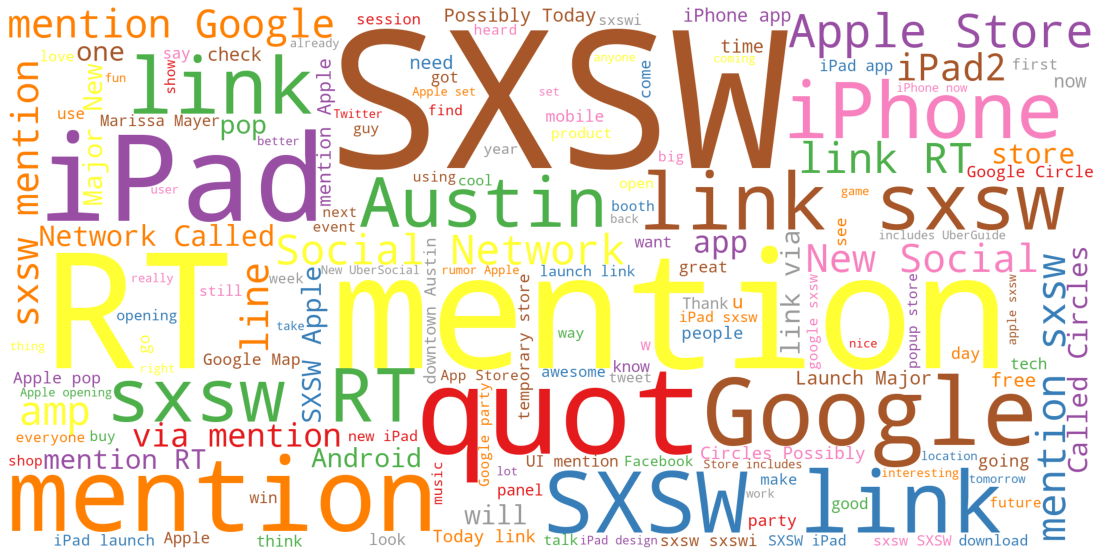

In [14]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)  
    plt.axis("off");
    
# Generate & plot wordcloud
stopwords = STOPWORDS
wordcloud=WordCloud(width=2000,height=1000,background_color="white",max_words=150,
                    colormap="Set1",stopwords=stopwords).generate(ttext)
plot_cloud(wordcloud)

**Punctuation**

In [15]:
no_punc_text = ttext.translate(str.maketrans(" "," ", string.punctuation)) 
no_punc_text = re.sub(r"http\S+\&\#[0-9]+\;","", no_punc_text)
no_punc_text = re.sub(r"\&\#[0-9]+\;","", no_punc_text)

**Tokenization**

In [16]:
# tokeinzing using tweettokenizer first and then wordtokenizer
tweet_token = TweetTokenizer(strip_handles=True)
tweets_tokens = tweet_token.tokenize(no_punc_text)
print("Tweet Tokens-",len(tweets_tokens))
Tweettoken = " ".join(tweets_tokens)
text_tokens = word_tokenize(Tweettoken)
print("Word Tokens-",len(text_tokens))

Tweet Tokens- 112007
Word Tokens- 112063


**Stop Words**

In [19]:
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
stop=("SXSW","@","rt","re","w","u","m","s","SXSWI")
my_stop_words.extend(["SXSW","@","rt","re","w","u","m","s","SXSWI"])
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
len(no_stop_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Satra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


79480

**Normalization**

In [20]:
lower_words = [x.lower() for x in no_stop_tokens]

**Lemmatizaion**

In [21]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(" ".join(lower_words))
lemmas = [token.lemma_ for token in doc]
Processed_Tweets = " ".join(lemmas)

**Feature Extraction                                                                        
Count Vectorizer**

In [22]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(X.toarray().shape)

(80493, 8034)


In [23]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(10)

,0
zynga,8033
zuckerberg,8032
zoom,8031
zone,8030
zomg,8029
zombie,8028
zomb,8027
zms,8026
zlf,8025
zite,8024


**Bi-grams and Tri-grams**

In [24]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)
print("Feature Names-",vectorizer_ngram_range.get_feature_names())
print("\n","Matrix Size: ",bow_matrix_ngram.toarray().shape)

Feature Names- ['amp', 'android', 'app', 'apple', 'at', 'austin', 'be', 'big', 'buy', 'call', 'can', 'check', 'circle', 'come', 'cool', 'day', 'design', 'do', 'download', 'downtown', 'find', 'first', 'free', 'game', 'get', 'give', 'go', 'good', 'google', 'great', 'guy', 'if', 'ipad', 'iphone', 'its', 'just', 'know', 'launch', 'like', 'line', 'link', 'look', 'love', 'major', 'make', 'map', 'marissa', 'mayer', 'mention', 'mobile', 'music', 'need', 'network', 'new', 'news', 'next', 'not', 'one', 'open', 'panel', 'party', 'people', 'pop', 'popup', 'possibly', 'product', 're', 'rt', 'rumor', 'say', 'search', 'see', 'sell', 'set', 'shop', 'show', 'social', 'store', 'sxsw', 'sxswi', 'take', 'talk', 'tech', 'temporary', 'thank', 'the', 'think', 'time', 'today', 'uimention', 'update', 'use', 'user', 'via', 'want', 'we', 'well', 'win', 'year', 'you']

 Matrix Size:  (80493, 100)


**TF-IDF Vectorizer**

In [25]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 200)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print("Feature Names",vectorizer_n_gram_max_features.get_feature_names())
print("\n","Matrix Size: ",tf_idf_matrix_n_gram_max_features.toarray().shape)

Feature Names ['2011', '2s', '6th', 'also', 'amp', 'and', 'android', 'anyone', 'app', 'apple', 'around', 'at', 'austin', 'away', 'awesome', 'back', 'be', 'begin', 'big', 'bing', 'blackberry', 'block', 'booth', 'bring', 'buy', 'call', 'can', 'case', 'check', 'circle', 'code', 'come', 'congress', 'cool', 'could', 'day', 'design', 'digital', 'do', 'download', 'downtown', 'even', 'event', 'ever', 'everyone', 'facebook', 'fast', 'fb', 'feature', 'find', 'first', 'for', 'free', 'friend', 'fun', 'future', 'game', 'get', 'give', 'go', 'good', 'google', 'great', 'guy', 'have', 'head', 'hear', 'hey', 'how', 'if', 'in', 'include', 'ipad', 'iphone', 'it', 'its', 'japan', 'just', 'know', 'last', 'launch', 'leave', 'let', 'like', 'line', 'link', 'live', 'location', 'long', 'look', 'love', 'major', 'make', 'map', 'maps', 'marissa', 'may', 'mayer', 'meet', 'mention', 'mobile', 'music', 'my', 'need', 'network', 'new', 'news', 'next', 'nice', 'no', 'not', 'one', 'open', 'panel', 'party', 'people', 'phon

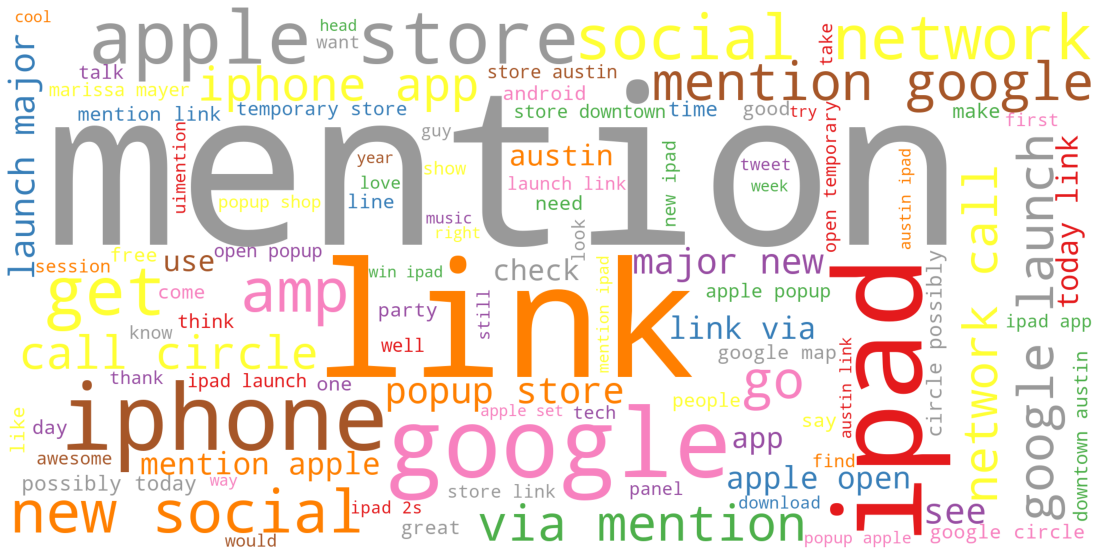

In [26]:
wordcloud=WordCloud(width=2000,height=1000,background_color="white",max_words=100,colormap="Set1",
                    stopwords=my_stop_words).generate(Processed_Tweets)
plot_cloud(wordcloud)

**Name Entity Recognition                                                        
Entity Tagging**

In [27]:
nlp = spacy.load("en_core_web_sm")
one_block = Processed_Tweets
doc_block = nlp(one_block)

**Parts of Speech Tagging**

In [28]:
for token in doc_block[0:10]:
    print(token,"-", token.pos_)

the - DET
web - NOUN
designeruas - PROPN
guide - VERB
ios - PRON
android - VERB
app - NOUN
today - NOUN
mention - VERB
10 - NUM


In [29]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(nouns_verbs[0:15])

['web', 'guide', 'android', 'app', 'today', 'mention', 'link', 'line', 'ipad', 'today', 'yesterday', 'get', 'line', 'today', 'fun']


In [30]:
#Counting tokens again
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ["word", "count"]
print(len(wf_df))
wf_df[0:10]

3910


,word,count
0,mention,3291
1,link,2410
2,ipad,1511
3,apple,1209
4,store,979
5,iphone,855
6,launch,578
7,app,514
8,get,449
9,austin,432


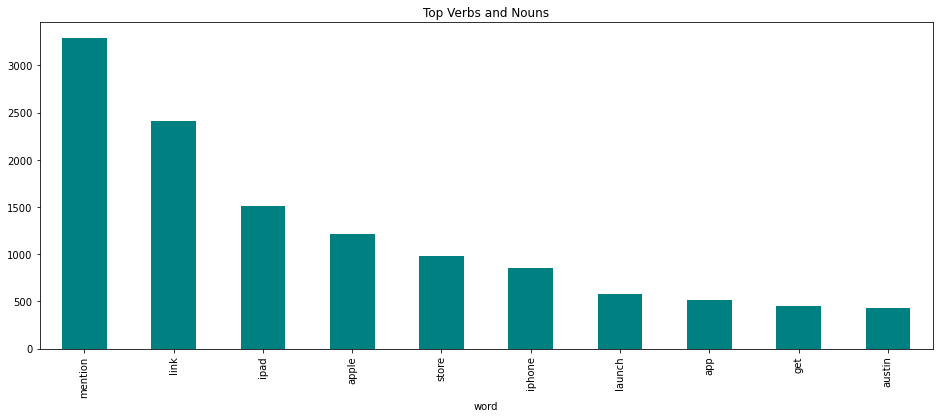

In [31]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x="word",figsize=(16,6),legend=False,title="Top Verbs and Nouns",color="teal");

**Sentimental Analysis**

In [32]:
#tokenize into sentences
sentences = tokenize.sent_tokenize(" ".join(amazon))
sentences[0:5]

['The Web DesignerUas Guide to iOS (and Android) Apps, today @mention 10 a.m!',
 '{link} #sxsw RT @mention Line for iPad 2 is longer today than yesterday.',
 '#SXSW  // are you getting in line again today just for fun?',
 'Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid #sxsw eye pad too seekers.',
 'The lesson from Google One Pass: In this digital environment, users want to purchase across every platform with one tool.']

In [33]:
#review to individual sentences
sent_df = pd.DataFrame(sentences, columns=["sentence"])
sent_df.head()

,sentence
0,The Web DesignerUas Guide to iOS (and Android)...
1,{link} #sxsw RT @mention Line for iPad 2 is lo...
2,#SXSW // are you getting in line again today ...
3,Crazy that Apple is opening a temporary store ...
4,The lesson from Google One Pass: In this digit...


In [34]:
afinn = pd.read_csv('E:/ExcelR/Data Science(Andheri-Sadanand-Chirag)(21st Aug 2021)/Data Set Files/22.Afinn.csv', 
                    sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [35]:
amazon = pd.DataFrame(az["Product_Description"])
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
amazon["Product_Description"] = amazon["Product_Description"].apply(remove_accent)
amazon["Product_Description"] = amazon["Product_Description"].astype("str")
amazon = [Product_Description.strip() for Product_Description in amazon.Product_Description]
amazon = [Product_Description for Product_Description in amazon if Product_Description] 
sentences = tokenize.sent_tokenize(" ".join(amazon))
sentences[:5]

['The Web DesignerUas Guide to iOS (and Android) Apps, today @mention 10 a.m!',
 '{link} #sxsw RT @mention Line for iPad 2 is longer today than yesterday.',
 '#SXSW  // are you getting in line again today just for fun?',
 'Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid #sxsw eye pad too seekers.',
 'The lesson from Google One Pass: In this digital environment, users want to purchase across every platform with one tool.']

In [36]:
#review to individual sentences
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df.head()

,sentence
0,The Web DesignerUas Guide to iOS (and Android)...
1,{link} #sxsw RT @mention Line for iPad 2 is lo...
2,#SXSW // are you getting in line again today ...
3,Crazy that Apple is opening a temporary store ...
4,The lesson from Google One Pass: In this digit...


In [37]:
stemmer = PorterStemmer()

#preprocess function 
stem_words=lambda x: stemmer.stem(x)
break_into_words = lambda x : re.findall("[a-zA-Z0-9]+", x)
skip_numeric = lambda x : [w for w in x if not w.isnumeric()]

#apply pre-processing steps
processed_text=sent_df["sentence"].map(break_into_words)\
        .map(skip_numeric)
sent_df["processed"]=processed_text

In [38]:
#creating a dictionary for affin scores
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [39]:
#Custom function :score each word in a sentence in lemmatised form,but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores
# user defined function to calculate aggregate scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [40]:
#sentiment on whole text
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)

In [41]:
sent_df.head()

,sentence,processed,sentiment_value,word_count
0,The Web DesignerUas Guide to iOS (and Android)...,"[The, Web, DesignerUas, Guide, to, iOS, and, A...",0,13
1,{link} #sxsw RT @mention Line for iPad 2 is lo...,"[link, sxsw, RT, mention, Line, for, iPad, is,...",0,13
2,#SXSW // are you getting in line again today ...,"[SXSW, are, you, getting, in, line, again, tod...",4,12
3,Crazy that Apple is opening a temporary store ...,"[Crazy, that, Apple, is, opening, a, temporary...",0,20
4,The lesson from Google One Pass: In this digit...,"[The, lesson, from, Google, One, Pass, In, thi...",1,20


In [42]:
sent_df['index']=range(0,len(sent_df))

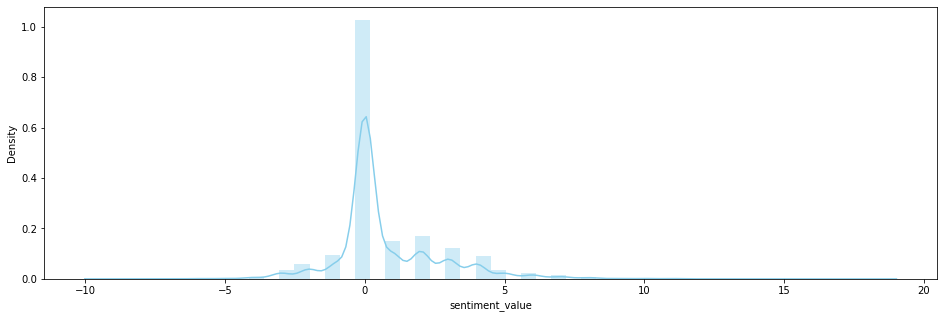

In [43]:
plt.figure(figsize=(16, 5))
sns.distplot(sent_df['sentiment_value'],color="skyblue");

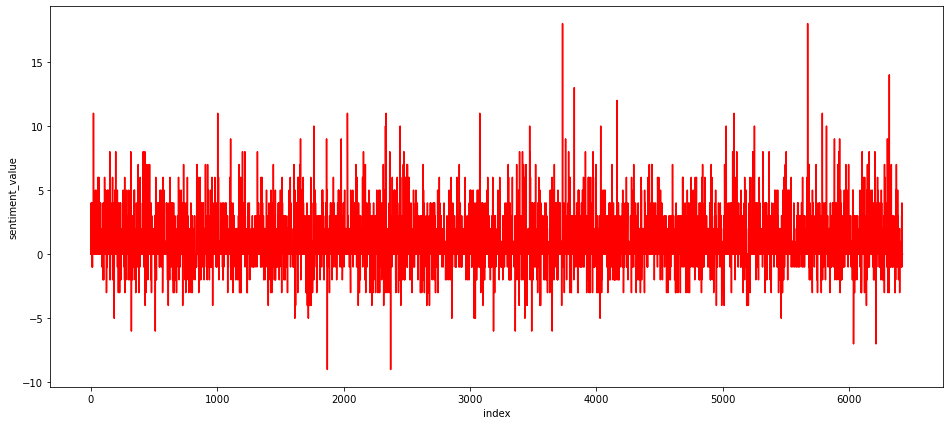

In [44]:
plt.figure(figsize=(16, 7))
sns.lineplot(y='sentiment_value',x='index',data=sent_df,color="red");

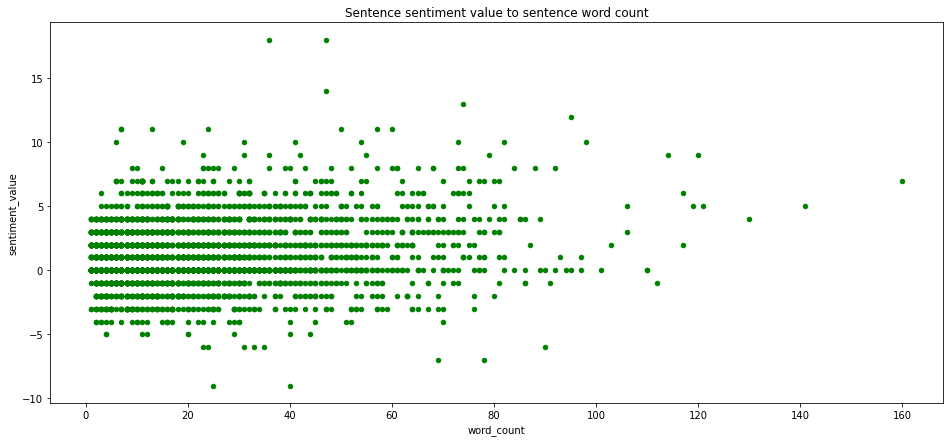

In [45]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(16,7),title='Sentence sentiment value to sentence word count',color="g");